In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os


In [9]:
dir_data = '/storage/silver/MONC_data/Alanna/bomex/BOMEX_m0020_g0800_all_14400_gaussian_filter_Pr_profiles_'
plotdir = '/storage/silver/MONC_data/Alanna/bomex/plots/'

In [3]:
data_2D = xr.open_dataset(dir_data + '2D.nc')
data_4D = xr.open_dataset(dir_data + '4D.nc')

C_th_2 = data_2D['C_th_prof'].data[0, ...]
C_th_4 = data_4D['C_th_prof'].data[0, ...]

In [4]:
z = np.arange(0, 3020, 20)

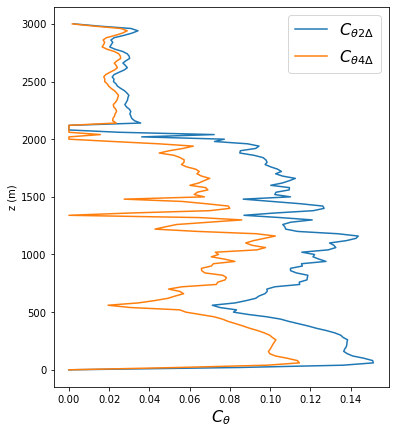

In [11]:
plt.figure(figsize=(6,7))
plt.plot(C_th_2, z, label = '$C_{\\theta 2 \Delta}$')
plt.plot(C_th_4, z, label = '$C_{\\theta 4 \Delta}$')
plt.xlabel('$C_{\\theta}$', fontsize=16)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig(plotdir+'C_th_prof.png')

In [15]:
C_th_sq_2 = data_2D['C_th_sq_prof'].data[0, ...]
C_th_sq_4 = data_4D['C_th_sq_prof'].data[0, ...]

In [11]:
Cs_sq_field_2 = data_2D['Cs_sq_field'].data[0, ...]
Cs_sq_field_4 = data_4D['Cs_sq_field'].data[0, ...]

In [13]:
def beta_calc(C_2D_sq_in, C_4D_sq_in):
    
    Cs_2D_sq_copy1 = C_2D_sq_in.copy()
    Cs_2D_sq_copy2 = C_2D_sq_in.copy()
    Cs_4D_sq_copy = C_4D_sq_in.copy()
    
    Cs_2D_sq_copy2[Cs_2D_sq_copy1==0.00000] = 1
    Cs_4D_sq_copy[Cs_2D_sq_copy1==0.00000] = 500 #remain as scale dependant
    
    beta = Cs_4D_sq_copy/Cs_2D_sq_copy2
    beta[beta < 0.125] = 0.125
    #beta[beta > 5] = 5
    
    return beta

In [16]:
beta = beta_calc(C_th_sq_2, C_th_sq_4)

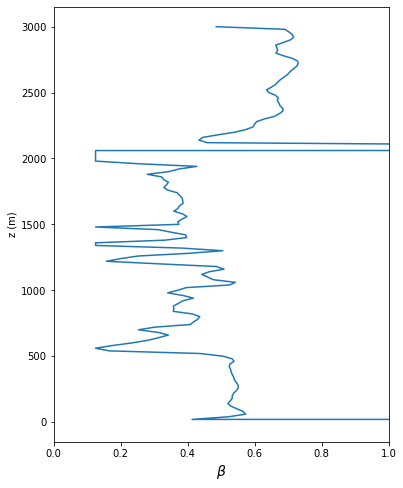

In [20]:
plt.figure(figsize=(6,8))
plt.plot(beta, z)
plt.xlabel('$\\beta$', fontsize=14)
plt.ylabel("z (m)")
plt.xlim(0, 1)
plt.savefig(plotdir+'beta_prof_zoom.png')

In [21]:
C_th_beta_sq = C_th_sq_2/beta

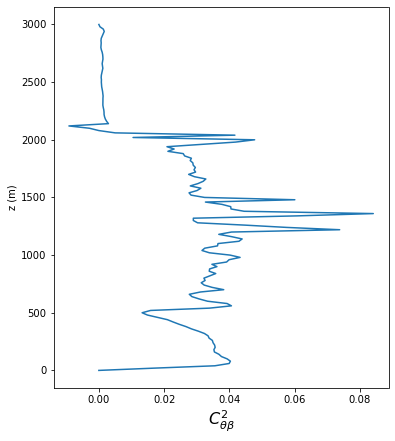

In [27]:
plt.figure(figsize=(6,7))
plt.plot(C_th_beta_sq, z)
plt.xlabel('$C_{\\theta \\beta} ^2$', fontsize=16)
plt.ylabel("z (m)")
#plt.xlim(1, 3)
plt.savefig(plotdir+'C_th_beta_sq_prof.png')

In [28]:
def get_Cs(Cs_sq):
    """ calculates C_s from C_s^2 by setting neg values to zero
    and sq rooting"""

    Cs_sq_copy = Cs_sq.copy()
    Cs_sq_copy[Cs_sq < 0] = 0
    Cs = np.sqrt(Cs_sq_copy)

    return Cs

In [29]:
C_th_beta = get_Cs(C_th_beta_sq)

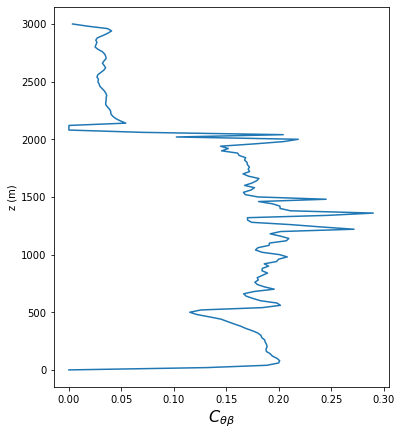

In [33]:
plt.figure(figsize=(6,7))
plt.plot(C_th_beta, z)
plt.xlabel('$C_{\\theta \\beta}$', fontsize=16)
plt.ylabel("z (m)")
#plt.xlim(1, 3)
plt.savefig(plotdir+'C_th_beta_prof.png')

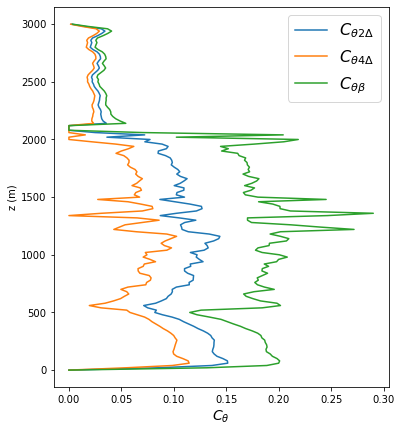

In [34]:
plt.figure(figsize=(6,7))
plt.plot(C_th_2, z, label = '$C_{\\theta 2 \\Delta}$')
plt.plot(C_th_4, z, label = '$C_{\\theta 4 \\Delta}$')
plt.plot(C_th_beta, z, label = '$C_{\\theta \\beta}$')
plt.xlabel('$C_{\\theta}$', fontsize=14)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig(plotdir+'C_th_prof_w_beta.png')

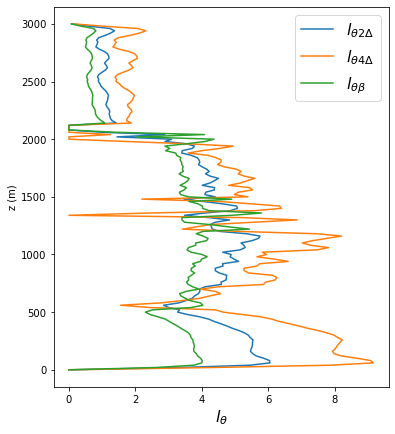

In [37]:
plt.figure(figsize=(6,7))
plt.plot(C_th_2*(40), z, label = '$l_{\\theta 2 \\Delta}$')
plt.plot(C_th_4*(80), z, label = '$l_{\\theta 4 \\Delta}$')
plt.plot(C_th_beta*(20), z, label = '$l_{\\theta \\beta}$')
plt.xlabel('$l_{\\theta}$', fontsize=16)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig(plotdir+'l_th.png')

In [40]:
def l_mix_MONC(Cs, Delta, z_in, k=0.4, Pr=1):

    l_mix = np.sqrt( 1 / ( (1/((Cs*Cs)/(Pr*Pr) * Delta*Delta)) + (1/(k*k * z_in*z_in)) ) )

    return l_mix

In [45]:
monc_l_20 = l_mix_MONC(0.23, 20, z, k=0.4, Pr=0.7)
monc_l_40 = l_mix_MONC(0.23, 40, z, k=0.4, Pr=0.7)
monc_l_80 = l_mix_MONC(0.23, 80, z, k=0.4, Pr = 0.7)

/home/users/si818415/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


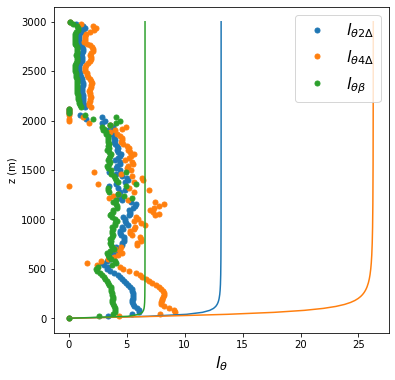

In [48]:
plt.figure(figsize=(6,6))
plt.plot(C_th_2*(40), z, '.', markersize = 10, label = '$l_{\\theta 2 \\Delta}$')
plt.plot(C_th_4*(80), z, '.', markersize = 10, label = '$l_{\\theta 4 \\Delta}$')
plt.plot(C_th_beta*(20), z, '.', markersize = 10, label = '$l_{\\theta \\beta}$')

plt.plot(monc_l_40, z, 'tab:blue')
plt.plot(monc_l_80, z, 'tab:orange')
plt.plot(monc_l_20, z, 'tab:green')

plt.xlabel('$l_{\\theta}$', fontsize=16)
plt.ylabel("z (m)")
plt.legend(fontsize=16, loc='upper right')
#plt.xlim(1, 3)
plt.savefig(plotdir+'l_th_w_MONC.png')

In [ ]:
plt.figure(figsize=(8,4))

levels1 = np.linspace(0,0.4,5)
cm1 = plt.contourf(np.transpose(cs_2D[:,y,:]), levels1, extend='both')
cb1 = plt.colorbar(cm1)
plt.xlabel('x')
plt.ylabel("z")
plt.title(f'$C_s$ 2D at y = {y}')
cb1.set_label(f"$C_s$", size=12)
plt.savefig(f"plots/Cs_2D_y={y}.png")